In [7]:
R.version.string

[1] "R version 4.1.1 (2021-08-10)"

In [8]:
# Library block
library(readr)
library(ggplot2)
library(tidyverse)
library(rpart)

In [9]:
train = read.csv("train.csv")
dim(train)

[1] 3071  143

In [10]:
head(train)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,⋯,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,ID_279628684,190000,0,3,0,1,1,0,NA,0,⋯,100,1849,1,100,0,1.000000,0,100,1849,4
2,ID_f29eb3ddd,135000,0,4,0,1,1,1,1,0,⋯,144,4489,1,144,0,1.000000,64,144,4489,4
3,ID_68de51c94,NA,0,8,0,1,1,0,NA,0,⋯,121,8464,1,0,0,0.250000,64,121,8464,4
4,ID_d671db89c,180000,0,5,0,1,1,1,1,0,⋯,81,289,16,121,4,1.777778,1,121,289,4
5,ID_d56d6f5f5,180000,0,5,0,1,1,1,1,0,⋯,121,1369,16,121,4,1.777778,1,121,1369,4
6,ID_ec05b1a7b,180000,0,5,0,1,1,1,1,0,⋯,121,1444,16,121,4,1.777778,1,121,1444,4


In [11]:
features = read_csv("codebook.csv")
features

Rows: 141 Columns: 2

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Variable name, Variable description


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Variable name,Variable description
<chr>,<chr>
v2a1,Monthly rent payment
hacdor,=1 Overcrowding by bedrooms
rooms,number of all rooms in the house
hacapo,=1 Overcrowding by rooms
v14a,=1 has toilet in the household
refrig,=1 if the household has refrigerator
v18q,owns a tablet
v18q1,number of tablets household owns
r4h1,Males younger than 12 years of age


## **Checking NA values**

In [12]:
dim(train)

[1] 3071  143

In [13]:
sum(is.na(train))

[1] 6560

In [14]:
options(repr.matrix.max.cols=150, repr.matrix.max.rows=200)

In [15]:
df <- data.frame(t(colSums(is.na(train))))
df %>% 
  select_if(~ sum(.) > 0)

v2a1,v18q1,rez_esc,meaneduc,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1914,2005,2606,5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,6,1,1


For 'rez_ecs' : Can drop column

For 'v2a1', 'v18q1', 'SQBmeaned', 'meaneduc' : Replace NA with median value

In [16]:
train <- subset(train, select = -c(rez_esc))
train$v2a1[is.na(train$v2a1)] <- median(train$v2a1, na.rm=TRUE)
train$v18q1[is.na(train$v18q1)] <- median(train$v18q1, na.rm=TRUE)
train$SQBmeaned[is.na(train$SQBmeaned)] <- median(train$SQBmeaned, na.rm=TRUE)
train$meaneduc[is.na(train$meaneduc)] <- median(train$meaneduc, na.rm=TRUE)

In [17]:
sum(is.na(train))

[1] 24

In [18]:
dim(train)

[1] 3071  142

In [19]:
head(train)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,ID_279628684,190000,0,3,0,1,1,0,1,0,1,1,0,0,0,0,1,1,1,1,10,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0,100,1849,4
2,ID_f29eb3ddd,135000,0,4,0,1,1,1,1,0,1,1,0,0,0,0,1,1,1,1,12,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64,144,4489,4
3,ID_68de51c94,150000,0,8,0,1,1,0,1,0,0,0,0,1,1,0,1,1,1,1,11,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64,121,8464,4
4,ID_d671db89c,180000,0,5,0,1,1,1,1,0,2,2,1,1,2,1,3,4,4,4,9,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1,121,289,4
5,ID_d56d6f5f5,180000,0,5,0,1,1,1,1,0,2,2,1,1,2,1,3,4,4,4,11,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1,121,1369,4
6,ID_ec05b1a7b,180000,0,5,0,1,1,1,1,0,2,2,1,1,2,1,3,4,4,4,11,4,1,0,0,0,

## **Dealing with Categorical Data**

In [20]:
head(train, 10)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,ID_279628684,190000,0,3,0,1,1,0,1,0,1,1,0,0,0,0,1,1,1,1,10,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0,100,1849,4
2,ID_f29eb3ddd,135000,0,4,0,1,1,1,1,0,1,1,0,0,0,0,1,1,1,1,12,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64,144,4489,4
3,ID_68de51c94,150000,0,8,0,1,1,0,1,0,0,0,0,1,1,0,1,1,1,1,11,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64,121,8464,4
4,ID_d671db89c,180000,0,5,0,1,1,1,1,0,2,2,1,1,2,1,3,4,4,4,9,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1,121,289,4
5,ID_d56d6f5f5,180000,0,5,0,1,1,1,1,0,2,2,1,1,2,1,3,4,4,4,11,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1,121,1369,4
6,ID_ec05b1a7b,180000,0,5,0,1,1,1,1,0,2,2,1,1,2,1,3,4,4,4,11,4,1,0,0,0,

In [21]:
train %>%
  select_if(is.character) %>%
  head(10)

,Id,idhogar,dependency,edjefe,edjefa
,<chr>,<chr>,<chr>,<chr>,<chr>
1,ID_279628684,21eb7fcc1,no,10,no
2,ID_f29eb3ddd,0e5d7a658,8,12,no
3,ID_68de51c94,2c7317ea8,8,no,11
4,ID_d671db89c,2b58d945f,yes,11,no
5,ID_d56d6f5f5,2b58d945f,yes,11,no
6,ID_ec05b1a7b,2b58d945f,yes,11,no
7,ID_e9e0c1100,2b58d945f,yes,11,no
8,ID_3e04e571e,d6dae86b7,yes,9,no
9,ID_1284f8aad,d6dae86b7,yes,9,no


Id column not needed for classification, though keep for right now 

'idhogar' column : Household level identifier (find number of unique values and figure out)

'dependency' : Dependency rate

'edjefe' : Years of education for male head of family (replace 'no' with zero)

'edjefa' : Years of education for female head of family (replace 'no' with zero)


In [22]:
count(unique(train[c('idhogar')]))

n
<int>
987


In [23]:
as.data.frame(table(train$idhogar))

Var1,Freq
<fct>,<int>
006555fe2,5
00e443b00,1
00edc0d0f,6
01c6fcb6e,1
01ff6a086,2
023edfed0,3
0250e0b59,3
035bb4b72,6
0369a5d78,3


Too many unique values with small frequencies 

Implementing label encoding

In [25]:
install.packages('superml')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Metrics’, ‘BH’, ‘RcppArmadillo’




In [26]:
library(superml)
label <- LabelEncoder$new()
#print(label$fit(train$idhogar))
train$idhogar <- label$fit_transform(train$idhogar)

Loading required package: R6



In [27]:
as.data.frame(table(train$idhogar))

Var1,Freq
<fct>,<int>
0,1
1,1
2,1
3,4
4,4
5,2
6,2
7,4
8,2


In [28]:
as.data.frame(table(train$dependency))

Var1,Freq
<fct>,<int>
.2,24
.22222222,11
.25,85
.33333334,220
.40000001,49
.5,480
.66666669,160
.75,49
1.2,11


In [29]:
as.data.frame(table(train$edjefe))

Var1,Freq
<fct>,<int>
10,58
11,304
12,30
13,36
14,83
15,129
16,41
17,93
18,13


In [30]:
as.data.frame(table(train$edjefa))

Var1,Freq
<fct>,<int>
10,43
11,177
12,37
13,21
14,64
15,79
16,49
17,49
19,4


For 'dependency', 'edjefe', 'edjefa' : replace 'no' with zero and 'yes' with median value

In [31]:
train$dependency[train$dependency == 'no'] = 0
train$dependency[train$dependency == 'yes'] = median(train$dependency)
as.data.frame(table(train$dependency))

Var1,Freq
<fct>,<int>
.2,24
.22222222,11
.25,85
.33333334,220
.40000001,49
.5,480
.66666669,160
.75,49
0,1305


In [32]:
train$edjefa[train$edjefa == 'no'] = 0
train$edjefa[train$edjefa == 'yes'] = median(train$edjefa)
as.data.frame(table(train$edjefa))

Var1,Freq
<fct>,<int>
0,1827
10,43
11,177
12,37
13,21
14,64
15,79
16,49
17,49


In [33]:
train$edjefe[train$edjefe == 'no'] = 0
train$edjefe[train$edjefe == 'yes'] = median(train$edjefe)
as.data.frame(table(train$edjefe))

Var1,Freq
<fct>,<int>
0,1373
10,58
11,318
12,30
13,36
14,83
15,129
16,41
17,93


## **Dealing wiht Class Imbalance (SMOTE)**

In [34]:
head(train)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,ID_279628684,190000,0,3,0,1,1,0,1,0,1,1,0,0,0,0,1,1,1,1,10,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,10,0,10,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0,100,1849,4
2,ID_f29eb3ddd,135000,0,4,0,1,1,1,1,0,1,1,0,0,0,0,1,1,1,1,12,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,8,12,0,12,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64,144,4489,4
3,ID_68de51c94,150000,0,8,0,1,1,0,1,0,0,0,0,1,1,0,1,1,1,1,11,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,1,1,1,8,0,11,11,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64,121,8464,4
4,ID_d671db89c,180000,0,5,0,1,1,1,1,0,2,2,1,1,2,1,3,4,4,4,9,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,3,2,2,0,4,0,11,0,11,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1,121,289,4
5,ID_d56d6f5f5,180000,0,5,0,1,1,1,1,0,2,2,1,1,2,1,3,4,4,4,11,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,2,2,0,4,0,11,0,11,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1,121,1369,4
6,ID_ec05b1a7b,180000,0,5,0,1,1,1,1,0,2,2,1,1,2,1,3,4,4,4,11,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,

In [35]:
train1 <- train
train1$Target[train1$Target == 1] = 'Extreme Poverty'
train1$Target[train1$Target == 2] = 'Moderate Poverty'
train1$Target[train1$Target == 3] = 'Vulnerable Household'
train1$Target[train1$Target == 4] = 'Non-Vulnerable Household'

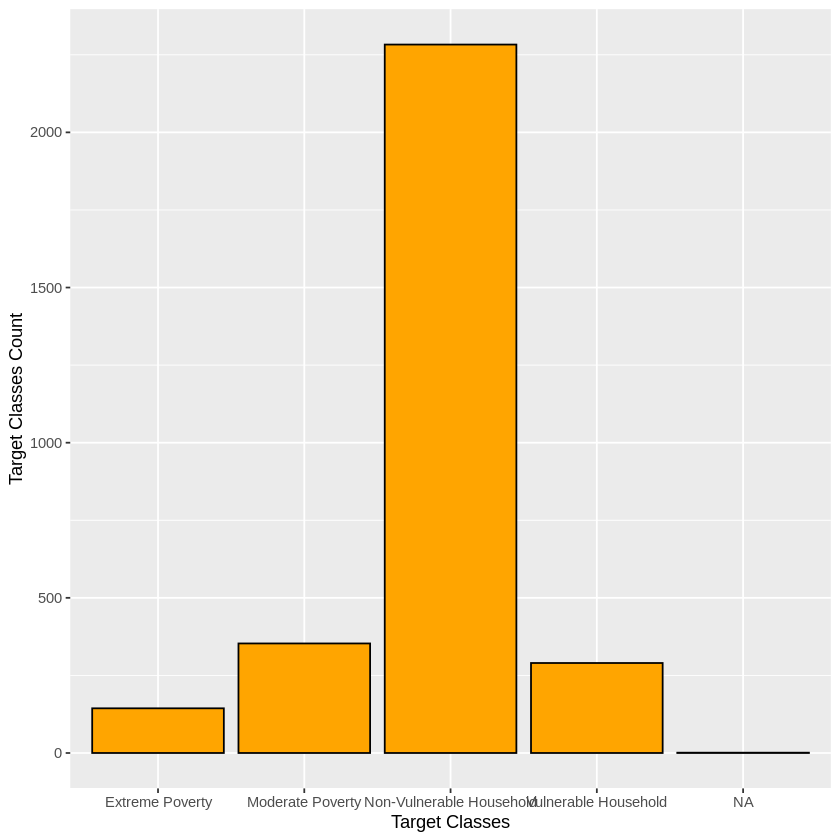

In [36]:
train1 %>%
ggplot(aes(Target))+
geom_bar(color = 'black', fill = 'orange')+
xlab("Target Classes")+
ylab("Target Classes Count")

In [37]:
library(devtools)
remotes::install_github("cran/DMwR")

Loading required package: usethis




bitops   (NA -> 1.0-7 ) [CRAN]
caTools  (NA -> 1.18.2) [CRAN]
gtools   (NA -> 3.9.2 ) [CRAN]
zoo      (NA -> 1.8-9 ) [CRAN]
xts      (NA -> 0.12.1) [CRAN]
gplots   (NA -> 3.1.1 ) [CRAN]
TTR      (NA -> 0.24.2) [CRAN]
ROCR     (NA -> 1.0-11) [CRAN]
abind    (NA -> 1.4-5 ) [CRAN]
quantmod (NA -> 0.4.18) [CRAN]


Installing 10 packages: bitops, caTools, gtools, zoo, xts, gplots, TTR, ROCR, abind, quantmod

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/Rtmpthzxhh/remotes414a46f153/cran-DMwR-6fd4f0c/DESCRIPTION’
─  preparing ‘DMwR’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘DMwR_0.4.1.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [38]:
library(DMwR)

Loading required package: lattice

Loading required package: grid

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [39]:
typeof(train$Target)

[1] "integer"

In [54]:
train1 <- train
train1 <- subset(train1, select = c(-Id))
str(train1)

'data.frame':	3071 obs. of  141 variables:
 $ v2a1           : num  190000 135000 150000 180000 180000 180000 180000 130000 130000 130000 ...
 $ hacdor         : int  0 0 0 0 0 0 0 1 1 1 ...
 $ rooms          : int  3 4 8 5 5 5 5 2 2 2 ...
 $ hacapo         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ v14a           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ refrig         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ v18q           : int  0 1 0 1 1 1 1 0 0 0 ...
 $ v18q1          : num  1 1 1 1 1 1 1 1 1 1 ...
 $ r4h1           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ r4h2           : int  1 1 0 2 2 2 2 1 1 1 ...
 $ r4h3           : int  1 1 0 2 2 2 2 1 1 1 ...
 $ r4m1           : int  0 0 0 1 1 1 1 2 2 2 ...
 $ r4m2           : int  0 0 1 1 1 1 1 1 1 1 ...
 $ r4m3           : int  0 0 1 2 2 2 2 3 3 3 ...
 $ r4t1           : int  0 0 0 1 1 1 1 2 2 2 ...
 $ r4t2           : int  1 1 1 3 3 3 3 2 2 2 ...
 $ r4t3           : int  1 1 1 4 4 4 4 4 4 4 ...
 $ tamhog         : int  1 1 1 4 4 4 4 4 4 4 ...
 $ tamviv         : int  

In [55]:
train1 %>%
  select_if(is.character) %>%
  head(2)

,dependency,edjefe,edjefa
,<chr>,<chr>,<chr>
1,0,10,0
2,8,12,0


In [57]:
train1$dependency <- as.integer(train1$dependency)
train1$edjefa <- as.integer(train1$edjefa)
train1$edjefe <- as.integer(train1$edjefe)

In [56]:
train1$Target <- as.factor(train1$Target)

In [58]:
as.data.frame(table(train$Target))

Var1,Freq
<fct>,<int>
1,144
2,353
3,290
4,2283


Undersampling would decrease the proportion of your majority class until the number is similar to the minority class. 

At the same time, Oversampling would resample the minority class proportion following the majority class proportion.


In [96]:
balanced_train <- SMOTE(Target ~ ., train1, perc.over = 2000, perc.under=140)

In [93]:
as.data.frame(table(balanced_train$Target))

Var1,Freq
<fct>,<int>
1,3024
2,497
3,402
4,3132


In [97]:
balanced_train1 <- SMOTE(Target ~., balanced_train, perc.over = 1000, perc.under = 200)

In [98]:
as.data.frame(table(balanced_train1$Target))

Var1,Freq
<fct>,<int>
1,3805
2,598
3,4532
4,3831


In [116]:
balanced_train2 <- SMOTE(Target ~., balanced_train1, perc.over = 400, perc.under = 350)

In [117]:
as.data.frame(table(balanced_train2$Target))

Var1,Freq
<fct>,<int>
1,2601
2,2990
3,3096
4,2671


## **Feature Importance (Permutation Based Variable Importance)**

In [119]:
install.packages('DALEX')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gridExtra’, ‘iBreakDown’, ‘ingredients’




In [153]:
library('DALEX')
library('randomForest')

In [123]:
dim(balanced_train2)

[1] 11362   141

In [125]:
library('caTools')

In [137]:
balanced_train2$Target <- as.numeric(balanced_train2$Target)

In [138]:
sample <- sample.split(balanced_train2$Target, SplitRatio = .75)
train_data <- subset(balanced_train2, sample==TRUE)
test_data <- subset(balanced_train2, sample==FALSE)

In [139]:
dim(train_data)

[1] 8518  141

In [140]:
dim(test_data)

[1] 2844  141

In [180]:
my_rf <- randomForest(Target ~., data = train_data)

Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”


In [181]:
explain_rf <- DALEX::explain(model = my_rf, 
                               data = test_data[,0:140], 
                               y = test_data$Target, 
                               label = "Random Forest")

Preparation of a new explainer is initiated
  -> model label       :  Random Forest 
  -> data              :  2844  rows  140  cols 
  -> target variable   :  2844  values 
  -> predict function  :  yhat.randomForest  will be used (  default  )
  -> predicted values  :  No value for predict function target column. (  default  )
  -> model_info        :  package randomForest , ver. 4.6.14 , task regression (  default  ) 
  -> predicted values  :  numerical, min =  NA , mean =  NA , max =  NA  
  -> residual function :  difference between y and yhat (  default  )
  -> residuals         :  numerical, min =  NA , mean =  NA , max =  NA  
  A new explainer has been created!  


In [182]:
loss_root_mean_square(observed = test_data$Target, predicted = predict(my_rf, test_data))

[1] 0.191122

In [183]:
set.seed(123)
(vip.50 <- model_parts(explainer = explain_rf, 
                      loss_function = loss_root_mean_square,
                      B = 50,
                      type = "difference"))

variable,permutation,dropout_loss,label
<chr>,<dbl>,<dbl>,<chr>
_full_model_,0,0.000000e+00,Random Forest
lugar2,0,-4.439253e-04,Random Forest
area1,0,-2.281068e-04,Random Forest
lugar1,0,-1.433321e-04,Random Forest
paredfibras,0,0.000000e+00,Random Forest
paredother,0,0.000000e+00,Random Forest
techootro,0,0.000000e+00,Random Forest
abastaguano,0,0.000000e+00,Random Forest
planpri,0,0.000000e+00,Random Forest


In [188]:
library('ggplot2')

In [197]:
tail(vip.50,20)

,variable,permutation,dropout_loss,label
,<chr>,<dbl>,<dbl>,<chr>
7223,qmobilephone,50,0.016516633,Random Forest
7224,lugar1,50,0.001763089,Random Forest
7225,lugar2,50,0.000696850,Random Forest
7226,lugar3,50,0.001874286,Random Forest
7227,lugar4,50,0.002010655,Random Forest
7228,lugar5,50,0.001985133,Random Forest
7229,lugar6,50,0.002009825,Random Forest
7230,area1,50,0.002010400,Random Forest
7231,area2,50,0.002010345,Random Forest


In [214]:
options(repr.plot.width = 10, repr.plot.height = 50)

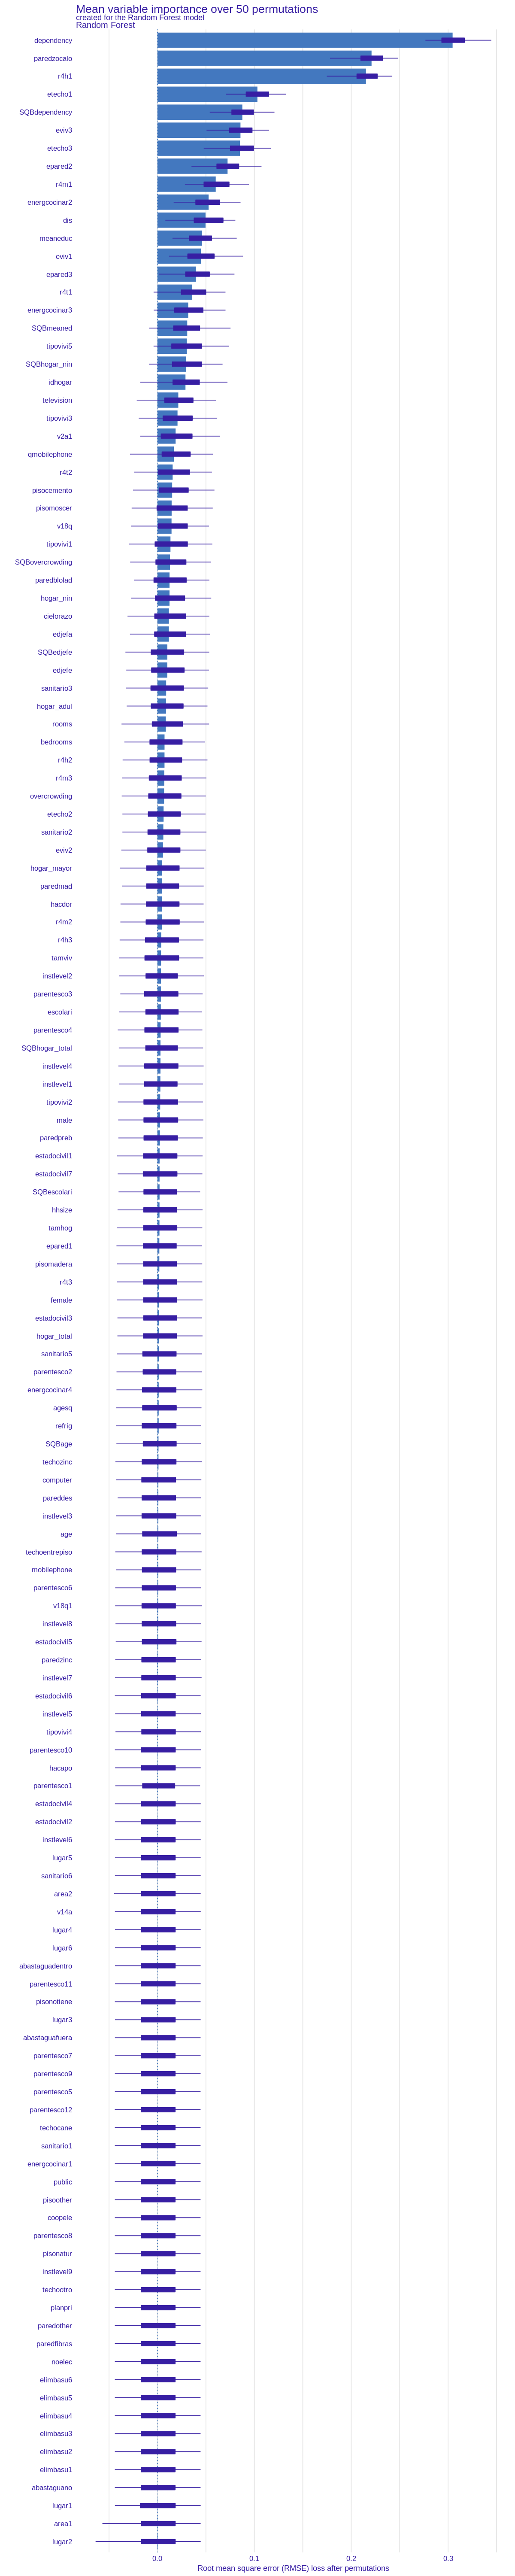

In [215]:
plot(vip.50) + 
  ggtitle("Mean variable importance over 50 permutations")

# **Correlation**

In [157]:
install.packages('Hmisc')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘png’, ‘jpeg’, ‘checkmate’, ‘htmlwidgets’, ‘Formula’, ‘latticeExtra’, ‘htmlTable’, ‘viridis’




In [158]:
library('Hmisc')

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




In [161]:
data.rcorr = rcorr(as.matrix(balanced_train2))

In [163]:
data.coeff <- data.rcorr$r
data.p <- data.rcorr$p

In [166]:
dim(data.coeff)

[1] 141 141

In [165]:
head(data.coeff,2)

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
v2a1,1.0000000,-0.1253396,0.2518694,-0.1226008,0.01369745,0.04368926,0.1397904,0.13581476,-0.06294055,-0.01664942,-0.06007404,-0.005353963,0.008528524,0.002602566,-0.04527261,-0.005956775,-0.03716596,-0.03664938,-0.05260397,0.16601521,-0.03664938,0.1541914,-0.01950516,-0.09006843,-0.01726494,-0.07445396,-0.1168394,-0.002124181,-0.001061950,0.2007299,-0.16219364,-0.004115453,-0.005722941,-0.04960331,-0.07750612,0.003227582,0.006507605,-0.004382415,-0.003186974,0.1821976,0.06569474,-0.06569474,NaN,0.05039964,NaN,NaN,-0.06485269,-0.01865217,0.02583827,-0.009069704,-0.02434605,-0.031182507,0.0001434837,0.07640479,-0.07591014,-0.006991882,0.001061950,NaN,NaN,NaN,NaN,-0.001061950,-0.06690166,-0.1292332,0.1709685,-0.043114245,-0.04336395,0.07686832,-0.13334479,-0.08428195,0.1720804,-0.02629799,-0.007573566,0.007573566,-0.03011547,0.0003236493,0.01738328,0.03111979,0.007674552,-0.02678864,0.00413008,0.02687387,-0.01363150,0.009169465,-0.02615570,-0.002747087,-0.04486533,-0.002951888,0.007531024,-0.01363927,0.04502294,0.01201085,-0.004388127,-0.09128399,-0.06755146,0.03455781,-0.04065038,-0.03664938,-0.049140793,0.1157581,0.07783187,0.2270694,-0.01816857,-0.07791399,-0.07374694,-0.04628775,0.03088535,-0.01326132,0.03805185,0.18053368,0.13569924,0.15420043,-0.1714477,-0.09232032,0.28132274,-0.02850137,-0.01286705,-0.03306117,0.28067039,0.02143806,0.02166184,0.06888192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.007206118,0.211146,-0.02098708,-0.06302229,0.1879032,-0.08246772,-0.1789146,-0.03219255,0.2200953,-0.02098708,0.1660720
hacdor,-0.1253396,1.0000000,-0.1092352,0.5603715,-0.11175650,-0.16851422,-0.1032761,-0.05804376,0.24875409,0.11585719,0.27957077,0.165207138,0.042957335,0.153078657,0.27456436,0.103997729,0.28049606,0.28093304,0.50992215,-0.09716351,0.28093304,-0.1071496,-0.03422475,-0.06855398,0.10890350,0.07877991,0.3443020,-0.005309496,-0.002654398,-0.1039976,0.01589726,-0.010286778,0.171629075,0.09165380,0.10288819,-0.014787192,-0.044438641,-0.015378213,-0.007965998,-0.3049090,-0.02036522,0.02036522,NaN,0.02232921,NaN,NaN,-0.01442835,0.07777165,-0.10967462,0.120204231,-0.04907986,-0.009202753,-0.0163792246,-0.07146259,0.02167221,0.223721047,0.002654398,NaN,NaN,NaN,NaN,-0.002654398,0.04663521,0.1804780,-0.2073809,0.007968346,0.07496166,-0.07422287,0.05057943,0.11469171,-0.1356088,0.21659079,0.140706489,-0.140706489,0.02303696,0.0387678210,-0.10861519,-0.04124459,-0.024203418,-0.04267896,0.10241533,-0.09441288,-0.05971901,0.098195915,-0.02495278,-0.007352195,0.07956498,-0.018843038,-0.006972399,-0.02203363,-0.01621406,-0.01745390,0.119270781,0.12250800,0.28996933,0.06640022,-0.09301526,0.28093304,

In [169]:
data.coeff1 <- as.data.frame(data.coeff[, 141])
head(data.coeff1, 2)

,"data.coeff[, 141]"
,<dbl>
v2a1,0.1660720
hacdor,-0.1480744


In [185]:
data.coeff <- as.data.frame(data.coeff)

In [186]:
data.coeff %>%
  select(Target) %>%
  arrange(desc(Target)) %>%
  filter(Target > 0.3)

,Target
,<dbl>
Target,1.0000000
epared3,0.4817791
etecho3,0.4593294
paredblolad,0.3906844
escolari,0.3651381
SQBescolari,0.3487131
age,0.3260164
hogar_adul,0.3095190


In [187]:
data.coeff %>%
  select(Target) %>%
  arrange(Target) %>%
  filter(Target < -0.3)

,Target
,<dbl>
r4t1,-0.5441837
etecho1,-0.4585212
hogar_nin,-0.4572691
r4m1,-0.4295140
epared2,-0.4042962
r4h1,-0.3908563
paredzocalo,-0.3782449
SQBhogar_nin,-0.3440485
estadocivil1,-0.3243198
